In [5]:
from albumentations import *
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
img = cv2.imread('997_107_rect0.jpg')
mask = cv2.imread('997_107_rect0.png',0)
print('img shape:',img.shape,'mask shape:',mask.shape)

img shape: (77, 97, 3) mask shape: (77, 97)


In [21]:
def visualize(image, mask, original_image=None, original_mask=None):
    fontsize = 18
    
    if original_image is None and original_mask is None:
        f, ax = plt.subplots(2, 1, figsize=(8, 8))

        ax[0].imshow(image)
        ax[1].imshow(mask)
    else:
        f, ax = plt.subplots(2, 2, figsize=(8, 8))

        ax[0, 0].imshow(original_image[:,:,::-1])
        ax[0, 0].set_title('Original image', fontsize=fontsize)
        
        ax[1, 0].imshow(original_mask)
        ax[1, 0].set_title('Original mask', fontsize=fontsize)
        
        ax[0, 1].imshow(image[:,:,::-1])
        ax[0, 1].set_title('Transformed image', fontsize=fontsize)
        
        ax[1, 1].imshow(mask)
        ax[1, 1].set_title('Transformed mask', fontsize=fontsize)

In [38]:
aug = Compose([PadIfNeeded(p=1, min_height=50, min_width=50, border_mode=0,always_apply=True),
               RandomRotate90(p=0.5),
              VerticalFlip(p=0.5),
              HorizontalFlip(p=0.5),
              ChannelShuffle(p=0.5),
              HueSaturationValue(p=0.5),
              RandomBrightnessContrast(0.5),
              Transpose(p=0.5)])

mask max 1


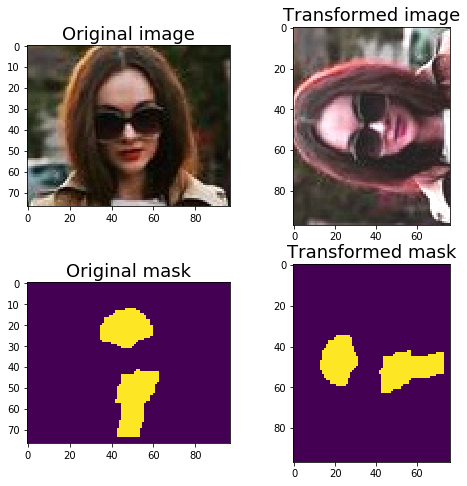

In [39]:
augmented = aug(image=img, mask=mask)

image_padded = augmented['image']
mask_padded = augmented['mask']
print('mask max',mask_padded.max())

visualize(image_padded, mask_padded, original_image=img, original_mask=mask)

In [40]:
from data_loader import *

Using TensorFlow backend.


In [ ]:
train, val = GetSampling('')